# Lets load in some ephys data and create a plot of it.

In [42]:
# The following import commands are modules that have helpful functions. Don't worry about them.
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
import os

In [43]:
# Load in the data using the program provided by OpenEphys. 
# This takes a little bit so wait for the star to disappear to the right
import OpenEphys

cwd = os.getcwd() # Gets your current working directory

pathToData = cwd + '\\data\\OP7\\100_CH1.continuous' # You can change this to look at other channels!
 
data = OpenEphys.load(pathToData)
print('data loaded in!')

Loading continuous data...
data loaded in!


## Now that we've loaded the data in. Let's look at what we can do with it.

In [39]:
# Lets check out what we got
print("The Sampling rate is :", data['header']['sampleRate'])

# There is a problem. The sampling rate is of type string even though we need it to be a float...
print("Sample rate is type :", type(data['header']['sampleRate']))

# So lets change it!
sampleRate = float(data['header']['sampleRate'])
print("The Sampling rate is still :", sampleRate)
print("But the type is now :", type(sampleRate))
print('Notice the precision changed. It\'s now 30000.0!')
print('') #Blank line

# The data is a little longer so we won't print it out. We can look at how many values are stored though.
print('Number of data points :', len(data['data']))
# The timestamps have a different number of values because there is only 1 timestamp per 1024 data samples.
# This is taken care of for you in the next step so don't worry about it.
print('Number of timestamps :', len(data['timestamps']))

The Sampling rate is : 30000
Sample rate is type : <class 'str'>
The Sampling rate is still : 30000.0
But the type is now : <class 'float'>
Notice the precision changed. It's now 30000.0!

Number of data points : 36165632
Number of timestamps : 35318


### Con is a class that takes in the ephys info and puts it into a easy to use object. Classes are very good ways of holding connected datas together.

Don't worry about what it does. Just know what we get from it.

The ephys information can now be found by the following:

#### conData.data holds the voltage at each timestamp

#### conData.ts holds the timestamps

#### conData.fs holds the sampling rate (how many samples per second)

In [14]:
class Con:
    def __init__(self, data):
        self.data = data['data'] # Volatage data
        self.fs = float(data['header']['sampleRate']) # Sample Rate
        self.interpTs(data['timestamps']) # Interpolate timestamps for all data points (Only has 1 time stamp for each buffer of 1024 data points)

    def interpTs(self, ts):
        tsStart = ts[0]
        tsEnd = ts[len(ts)-1]
        self.ts = np.linspace(tsStart, tsEnd, len(ts) * 1024) # Creates the array of timestamps
        i = 0
        for t in self.ts:
            self.ts[i] = t - tsStart # Zero out the timestamps, just makes it look better when graphing/explaining
            i = i + 1
        self.tsStart = tsStart # Send the ts start to event data
        
con = Con(data)

## Lets make a very simple plot

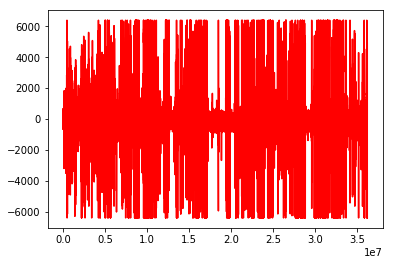

In [15]:
plt.plot(con.ts,con.data, 'r') # This also takes a bit as there is a lot of data.
# Now you have a plot of every voltage for every sample in the recording.

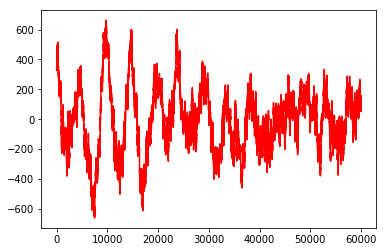

In [41]:
# Now lets get only the first 2 seconds of data, we'll use the sampling rate we saved before
timeElapsed = int(2 * con.fs) # Feel free to change the 1 to as many seconds as you (needs to be an integer for later)
timeStart = int(0 * con.fs) # Where do you want to start (0 is the start, can change to be as many seconds after as you want)
plt.plot(con.ts[timeStart:timeElapsed], con.data[timeStart:timeElapsed], 'r') # [startIndex:endIndex]

# Now time for you to try some programming yourself.

## First challenge

Use a for loop to iterate through the data points and plot a vertical line when the voltage goes above 500.

In [ ]:
timeElapsed = int(2 * con.fs) 
timeStart = int(0 * con.fs)

# Put code here!
# use matplotlib to create a vertical line (hint: use google!)

plt.plot(con.ts[timeStart:timeElapsed], con.data[timeStart:timeElapsed], 'r') 

## Second challenge

Plot a horizontal line at the average value for the data.

In [ ]:
timeElapsed = int(2 * con.fs) 
timeStart = int(0 * con.fs)

# Put code here!

plt.plot(con.ts[timeStart:timeElapsed], con.data[timeStart:timeElapsed], 'r') 
# use matplotlib to create a horizontal line (hint: use google!)

## Third challenge

Use the following imported module (butter) to create a bandpass filter to extract only the theta band (8-12hz)! I recommend writing a few functions to help you this with as well.

Use google to understand how to use butter. Also examples are very helpful!

In [ ]:
from scipy.signal import butter, lfilter, sosfilt # You will also need to use either lfilter or sosfilt. 
                                                  # There are multiple ways of doing this

# Put code here

plt.plot(con.ts[timeStart:timeElapsed], filteredData, 'r')